# Evaluate the performance of the Hungarian Investment Funds

1. Load the database...
isin.conf contains 716 different units. It will take some time to load even from local cache.

In [1]:
from befjegy import befjegy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import math

x=befjegy.from_file("isin.conf")

def get_name(isin):
    return [element["name"] for element in x.isin if element["isin"] == isin]    

INFO:befjegy:0. HU0000707146 loaded ok.
INFO:befjegy:1. HU0000702725 loaded ok.
INFO:befjegy:2. HU0000703764 loaded ok.
INFO:befjegy:3. HU0000703582 loaded ok.
INFO:befjegy:4. HU0000713367 loaded ok.
INFO:befjegy:5. HU0000706494 loaded ok.
INFO:befjegy:6. HU0000720883 loaded ok.
INFO:befjegy:7. HU0000704127 loaded ok.
INFO:befjegy:8. HU0000720891 loaded ok.
INFO:befjegy:9. HU0000705223 loaded ok.
INFO:befjegy:10. HU0000707229 loaded ok.
INFO:befjegy:11. HU0000709027 loaded ok.
INFO:befjegy:12. HU0000714951 loaded ok.
INFO:befjegy:13. HU0000702329 loaded ok.
INFO:befjegy:14. HU0000708052 loaded ok.
INFO:befjegy:15. HU0000707138 loaded ok.
INFO:befjegy:16. HU0000705280 loaded ok.
INFO:befjegy:17. HU0000703491 loaded ok.
INFO:befjegy:18. HU0000720784 loaded ok.
INFO:befjegy:19. HU0000711619 loaded ok.
INFO:befjegy:20. HU0000711601 loaded ok.
INFO:befjegy:21. HU0000702303 loaded ok.
INFO:befjegy:22. HU0000718135 loaded ok.
INFO:befjegy:23. HU0000706627 loaded ok.
INFO:befjegy:24. HU0000701

INFO:befjegy:198. HU0000716725 loaded ok.
INFO:befjegy:199. HU0000715164 loaded ok.
INFO:befjegy:200. HU0000714670 loaded ok.
INFO:befjegy:201. HU0000715834 loaded ok.
INFO:befjegy:202. HU0000720529 loaded ok.
INFO:befjegy:203. HU0000715396 loaded ok.
INFO:befjegy:204. HU0000713532 loaded ok.
INFO:befjegy:205. HU0000715404 loaded ok.
INFO:befjegy:206. HU0000715578 loaded ok.
INFO:befjegy:207. HU0000715586 loaded ok.
INFO:befjegy:208. HU0000715594 loaded ok.
INFO:befjegy:209. HU0000719380 loaded ok.
INFO:befjegy:210. HU0000720768 loaded ok.
INFO:befjegy:211. HU0000703426 loaded ok.
INFO:befjegy:212. HU0000715602 loaded ok.
INFO:befjegy:213. HU0000715610 loaded ok.
INFO:befjegy:214. HU0000714712 loaded ok.
INFO:befjegy:215. HU0000714431 loaded ok.
INFO:befjegy:216. HU0000712203 loaded ok.
INFO:befjegy:217. HU0000702881 loaded ok.
INFO:befjegy:218. HU0000720313 loaded ok.
INFO:befjegy:219. HU0000705041 loaded ok.
INFO:befjegy:220. HU0000705025 loaded ok.
INFO:befjegy:221. HU0000702667 loa

INFO:befjegy:394. HU0000714217 loaded ok.
INFO:befjegy:395. HU0000714209 loaded ok.
INFO:befjegy:396. HU0000713961 loaded ok.
INFO:befjegy:397. HU0000714043 loaded ok.
INFO:befjegy:398. HU0000715669 loaded ok.
INFO:befjegy:399. HU0000715081 loaded ok.
INFO:befjegy:400. HU0000714332 loaded ok.
INFO:befjegy:401. HU0000714514 loaded ok.
INFO:befjegy:402. HU0000714423 loaded ok.
INFO:befjegy:403. HU0000714837 loaded ok.
INFO:befjegy:404. HU0000713995 loaded ok.
INFO:befjegy:405. HU0000715636 loaded ok.
INFO:befjegy:406. HU0000714233 loaded ok.
INFO:befjegy:407. HU0000716360 loaded ok.
INFO:befjegy:408. HU0000713896 loaded ok.
INFO:befjegy:409. HU0000714407 loaded ok.
INFO:befjegy:410. HU0000714506 loaded ok.
INFO:befjegy:411. HU0000715123 loaded ok.
INFO:befjegy:412. HU0000717376 loaded ok.
INFO:befjegy:413. HU0000715222 loaded ok.
INFO:befjegy:414. HU0000714738 loaded ok.
INFO:befjegy:415. HU0000715867 loaded ok.
INFO:befjegy:416. HU0000707377 loaded ok.
INFO:befjegy:417. HU0000715206 loa

INFO:befjegy:590. HU0000718994 loaded ok.
INFO:befjegy:591. HU0000707997 loaded ok.
INFO:befjegy:592. HU0000717590 loaded ok.
INFO:befjegy:593. HU0000719034 loaded ok.
INFO:befjegy:594. HU0000719067 loaded ok.
INFO:befjegy:595. HU0000720743 loaded ok.
INFO:befjegy:596. HU0000721055 loaded ok.
INFO:befjegy:597. HU0000706049 loaded ok.
INFO:befjegy:598. HU0000717939 loaded ok.
INFO:befjegy:599. HU0000718853 loaded ok.
INFO:befjegy:600. HU0000718911 loaded ok.
INFO:befjegy:601. HU0000703186 loaded ok.
INFO:befjegy:602. HU0000718788 loaded ok.
INFO:befjegy:603. HU0000707740 loaded ok.
INFO:befjegy:604. HU0000703160 loaded ok.
INFO:befjegy:605. HU0000707724 loaded ok.
INFO:befjegy:606. HU0000714464 loaded ok.
INFO:befjegy:607. HU0000713482 loaded ok.
INFO:befjegy:608. HU0000702451 loaded ok.
INFO:befjegy:609. HU0000718523 loaded ok.
INFO:befjegy:610. HU0000704382 loaded ok.
INFO:befjegy:611. HU0000719190 loaded ok.
INFO:befjegy:612. HU0000707864 loaded ok.
INFO:befjegy:613. HU0000707880 loa

In [2]:
# Select top N funds with the highest net asset value
N=100
netassetvalues=dict()
for isin in x.isin:
    try:
        netassetvalues[isin["isin"]]=x.daily_rates[isin["isin"]][0]["netassetvalue"] 
    except:
        continue
largest_units=[]
for idx, key in enumerate(sorted(netassetvalues,key=netassetvalues.__getitem__,reverse=True)[:N]):
    print str(idx+1) + ". " + key + " with net asset value of:" + "{:,}".format(int(netassetvalues[key])) + "  (" + get_name(key)[0] + ")"
    largest_units.append(key)

1. HU0000703160 with net asset value of:456,002,440,138  (ERSTE Nyíltvégű Ingatlan Befektetési Alap)
2. HU0000702451 with net asset value of:354,062,259,229  (OTP Ingatlanbefektetési Alap)
3. HU0000706379 with net asset value of:190,536,626,048  (OTP Supra Származtatott Befektetési Alap)
4. HU0000702873 with net asset value of:189,329,001,847  (OTP Optima Tőkegarantált Kötvény Alap A sorozat)
5. HU0000713482 with net asset value of:179,997,914,304  (Magyar Posta Takarék Ingatlan Befektetési Alap "A" Sorozat)
6. HU0000703582 with net asset value of:150,409,134,749  (CIB Hozamgarantált Betét Alap CIB Hozamvédett Betét Alap)
7. HU0000703830 with net asset value of:117,187,765,076  (Erste Duett Nyíltvégű Alapok Alapja)
8. HU0000703491 with net asset value of:89,959,906,772  (OTP Tőkegarantált Pénzpiaci Alap)
9. HU0000702691 with net asset value of:78,128,354,945  (Budapest Állampapír Befektetési Alap A sorozat)
10. HU0000703418 with net asset value of:77,509,585,502  (K&H válogatott 2. ala

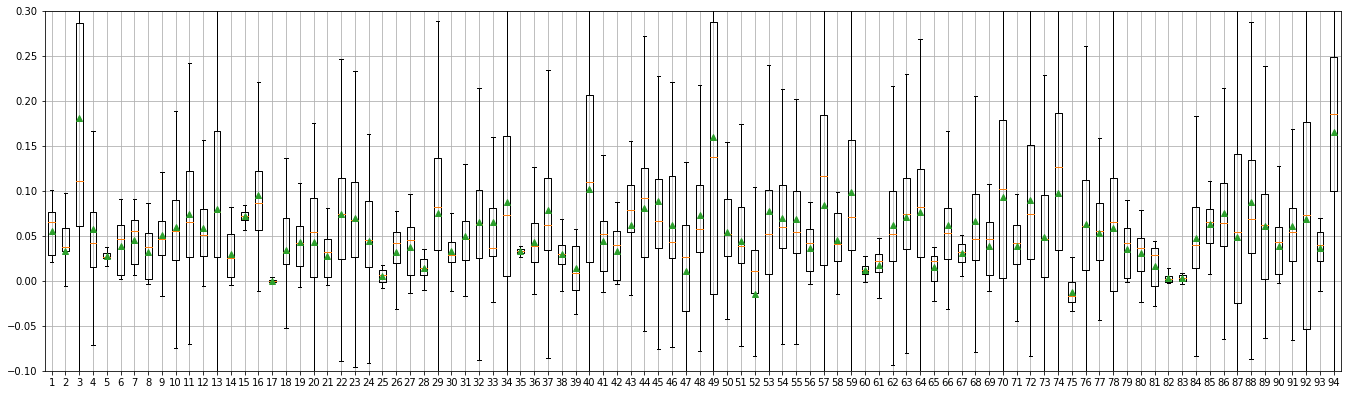

1. HU0000703160: Avg:0.0551 Dev:0.0251 (ERSTE Nyíltvégű Ingatlan Befektetési Alap)
2. HU0000702451: Avg:0.0336 Dev:0.0450 (OTP Ingatlanbefektetési Alap)
3. HU0000706379: Avg:0.1809 Dev:0.2034 (OTP Supra Származtatott Befektetési Alap)
4. HU0000702873: Avg:0.0575 Dev:0.0674 (OTP Optima Tőkegarantált Kötvény Alap A sorozat)
5. HU0000713482: Avg:0.0274 Dev:0.0044 (Magyar Posta Takarék Ingatlan Befektetési Alap "A" Sorozat)
6. HU0000703582: Avg:0.0382 Dev:0.0292 (CIB Hozamgarantált Betét Alap CIB Hozamvédett Betét Alap)
7. HU0000703830: Avg:0.0456 Dev:0.0260 (Erste Duett Nyíltvégű Alapok Alapja)
8. HU0000703491: Avg:0.0316 Dev:0.0287 (OTP Tőkegarantált Pénzpiaci Alap)
9. HU0000702691: Avg:0.0504 Dev:0.0296 (Budapest Állampapír Befektetési Alap A sorozat)
10. HU0000703418: Avg:0.0600 Dev:0.0500 (K&H válogatott 2. alapok nyíltvégű befektetési alapja)
11. HU0000703970: Avg:0.0746 Dev:0.0613 (Aegon Alfa Abszolút Hozamú Befektetési Alap A sorozat)
12. HU0000720644: Avg:0.0589 Dev:0.0397 (K&H Kö

IndexError: list index out of range

In [3]:
# boxgraph on the mean value and the deviation of the largest fund's yield. Period defined below 
period="1yyield"
result=[]
for isin in largest_units:
    yields=[d[period] for d in x.daily_rates[isin] if d[period] is not '']
    if len(yields)>0:
        result.append(np.asarray(yields))

fig = plt.figure(figsize=(18, 5),)
ax = fig.add_axes([0, 0, 1, 1]) # main axes
ax.boxplot(result,showmeans=True,showfliers=False)
ax.set_ylim([-0.1, 0.3])
plt.grid()
plt.show()
for idx,isin in enumerate(largest_units):
    mn = sum(result[idx])/len(result[idx])
    std = math.sqrt(sum([(e-mn)**2 for e in result[idx]]) / len(result[idx]))

    print str(idx+1) + ". " + isin +": Avg:" + str("%.4f" % mn) + " Dev:" + str("%.4f" % std) +" (" + get_name(isin)[0] + ")"

In [4]:
# N days avarage rate compared to the current price
N=300
avg200rates={}
for isin in x.isin:
    try:
        if len(x.daily_rates[isin["isin"]])>N:
            avg200rates[isin["isin"]]=sum([d["rate"]/x.daily_rates[isin["isin"]][0]["rate"] for d in x.daily_rates[isin["isin"]][0:N]])/N
    except:
        print "Error with:" + isin["isin"]

print "20 cheapest funds..."
for idx, key in enumerate(sorted(avg200rates,key=avg200rates.__getitem__,reverse=True)[:20]):
    print str(idx+1) + ". " + key + " " + str(N) + " day avg:" + str("%.4f" % avg200rates[key]) + "  (" + get_name(key)[0] + ")"
print "20 most expensive funds..."
for idx, key in enumerate(sorted(avg200rates,key=avg200rates.__getitem__)[:20]):
    print str(idx+1) + ". " + key + " " + str(N) + " day avg:" + str("%.4f" % avg200rates[key]) + "  (" + get_name(key)[0] + ")"


Error with:HU0000711304
20 cheapest funds...
1. HU0000712906 300 day avg:1.6302  (Budapest Nyersanyag Alapok Alapja U sorozat)
2. HU0000709100 300 day avg:1.6218  (OTP Török Részvény Alap C sorozat)
3. HU0000709001 300 day avg:1.5696  (OTP Török Részvény Alap A sorozat)
4. HU0000709076 300 day avg:1.5623  (OTP Török Részvény Alap B sorozat)
5. HU0000710165 300 day avg:1.4864  (AEGON IstanBull Részvény Befektetési Alap P sorozat)
6. HU0000713151 300 day avg:1.4777  (AEGON IstanBull Részvény Befektetési Alap PL sorozat)
7. HU0000707419 300 day avg:1.4515  (AEGON IstanBull Részvény Befektetési Alap "A" sorozat)
8. HU0000709522 300 day avg:1.4446  (AEGON IstanBull Részvény Befektetési Alap "I" sorozat)
9. HU0000713730 300 day avg:1.1568  (OTP Fundman Részvény Alap C sor.)
10. HU0000713714 300 day avg:1.1232  (OTP Fundman Részvény Alap A sor.)
11. HU0000702675 300 day avg:1.1229  (Quaestor AranyTallér Vegyes Nyíltvégű  Befektetési Alap)
12. HU0000713722 300 day avg:1.1151  (OTP Fundman Rész

In [5]:
# Trades in the last 30 days. Number of released units 
tradesNdays={}
for isin in x.isin:
    try:
        if len(x.daily_rates[isin["isin"]])>30:
            tradesNdays[isin["isin"]]=sum([d["trade"] for d in x.daily_rates[isin["isin"]][0:30]])
    except:
        print "Error with:" + isin["isin"]

print "20 most growing funds..."
for idx, key in enumerate(sorted(tradesNdays,key=tradesNdays.__getitem__,reverse=True)[:30]):
    print str(idx+1) + ". " + key + " Changes:" + "{:,}".format(int(tradesNdays[key])) + "  (" + get_name(key)[0] + ")"
print "20 most shrinking funds..."
for idx, key in enumerate(sorted(tradesNdays,key=tradesNdays.__getitem__)[:20]):
    print str(idx+1) + ". " + key + " Changes:" + "{:,}".format(int(tradesNdays[key])) + "  (" + get_name(key)[0] + ")"
 

20 most growing funds...
1. HU0000702451 Changes:27,788,778,706  (OTP Ingatlanbefektetési Alap)
2. HU0000703160 Changes:9,149,087,094  (ERSTE Nyíltvégű Ingatlan Befektetési Alap)
3. HU0000702006 Changes:6,166,007,253  (ERSTE Nyíltvégű Pénzpiaci Befektetési Alap)
4. HU0000703582 Changes:5,064,410,606  (CIB Hozamgarantált Betét Alap CIB Hozamvédett Betét Alap)
5. HU0000703830 Changes:4,123,426,780  (Erste Duett Nyíltvégű Alapok Alapja)
6. HU0000718523 Changes:3,690,385,450  (OTP PRIME Ingatlanbefektetési Alap)
7. HU0000701909 Changes:3,232,191,766  (Amundi Magyar Pénzpiaci Alap A Sorozat)
8. HU0000718762 Changes:2,931,464,454  (K&H állampapír nyíltvégű alap F sorozat)
9. HU0000703418 Changes:2,282,426,096  (K&H válogatott 2. alapok nyíltvégű befektetési alapja)
10. HU0000720644 Changes:2,003,827,523  (K&H Kötvény Nyíltvégű Befektetési Alap F Sorozat)
11. HU0000708656 Changes:1,837,707,879  (Erste Multi Asset Growth Alapok Alapja)
12. HU0000714464 Changes:1,776,015,244  (Magyar Posta Taka

In [2]:
# Detailed report on a selected fund....
ISIN="HU0000709001"
rt= [r["rate"]/x.daily_rates[ISIN][0]["rate"] for r in x.daily_rates[ISIN]]
tr = [sum([d["trade"] for d in x.daily_rates[ISIN]][i:len(x.daily_rates[ISIN])]) for i in range(len(x.daily_rates[ISIN]))]
dates= mdates.epoch2num([d["date"] for d in x.daily_rates[ISIN]])
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_axes([0, 0, 1, 1]) # main axes
fig.suptitle(get_name(ISIN)[0], fontsize=14, fontweight='bold')
line,=ax1.plot( dates,rt,label="rates",color="blue")
ax1.set_ylabel(r"rates (%)", fontsize=18, color="blue")
ax2=ax1.twinx()
line,=ax2.plot( dates,tr,label="trades",color="red")
ax2.set_ylabel(r"trade", fontsize=18, color="red")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))
plt.grid()
plt.show()

print "Net asset value: " + "{:,}".format(int(netassetvalues[ISIN])) + "HUF"
print "Category: " + [element["category"] for element in x.isin if element["isin"] == ISIN][0]



NameError: name 'x' is not defined

In [1]:
# Detailed report on a selected fund....
ISIN="HU0000709001"
rt= [r["rate"]/x.daily_rates[ISIN][0]["rate"] for r in x.daily_rates[ISIN]]
tr = [sum([d["trade"] for d in x.daily_rates[ISIN]][i:len(x.daily_rates[ISIN])]) for i in range(len(x.daily_rates[ISIN]))]
dates= mdates.epoch2num([d["date"] for d in x.daily_rates[ISIN]])
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_axes([0, 0, 1, 1]) # main axes
fig.suptitle(get_name(ISIN)[0], fontsize=14, fontweight='bold')
line,=ax1.plot( dates,rt,label="rates",color="blue")
ax1.set_ylabel(r"rates (%)", fontsize=18, color="blue")
ax2=ax1.twinx()
line,=ax2.plot( dates,tr,label="trades",color="red")
ax2.set_ylabel(r"trade", fontsize=18, color="red")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))
plt.grid()
plt.show()

print "Net asset value: " + "{:,}".format(int(netassetvalues[ISIN])) + "HUF"
print "Category: " + [element["category"] for element in x.isin if element["isin"] == ISIN][0]



NameError: name 'x' is not defined